# 🚢 Survival Prediction of the Titanic

<details>
<summary><strong>🔍 About This Lab & Benefits</strong></summary>

This experiment predicts whether Titanic passengers survived using open Titanic datasets.

**Objectives:**

- 📂 Use publicly available Titanic datasets as model input.
- 🧠 Build, train, and evaluate machine learning models.
- 🚀 Understand the overall process of building a machine learning model.

</details>

## 🛠️ Data Preparation
Loading and exploring the Titanic datasets.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Importing the datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
# View the first 5 rows of the dataset
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# View the last 5 rows of the dataset
df_train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Checking for missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info() # Missing Survived column in train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
# Checking numerical features
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# View information about categorical features
df_train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


## 📊 Exploratory Data Analysis
Checking survival probability and feature statistics.

In [9]:
df_train.groupby('Pclass')['Survived'].mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
df_train.groupby('SibSp')['Survived'].mean().reset_index()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
df_train.groupby('Sex')['Survived'].mean().reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


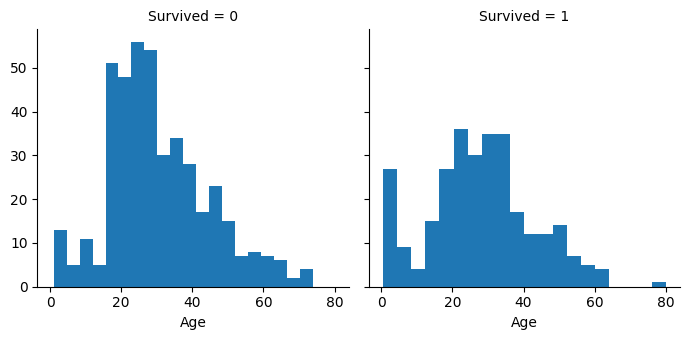

In [12]:
# Plot the Survived feature based on the Age feature and the gender of the passengers
df_age = df_train.dropna(subset=['Age'])
g = sns.FacetGrid(df_age, col="Survived", sharex=True, sharey=True, height=3.5)
g.map(plt.hist, "Age", bins=20)
g.set_axis_labels("Age", "")
g.set_titles("Survived = {col_name}")
plt.tight_layout()
plt.show()

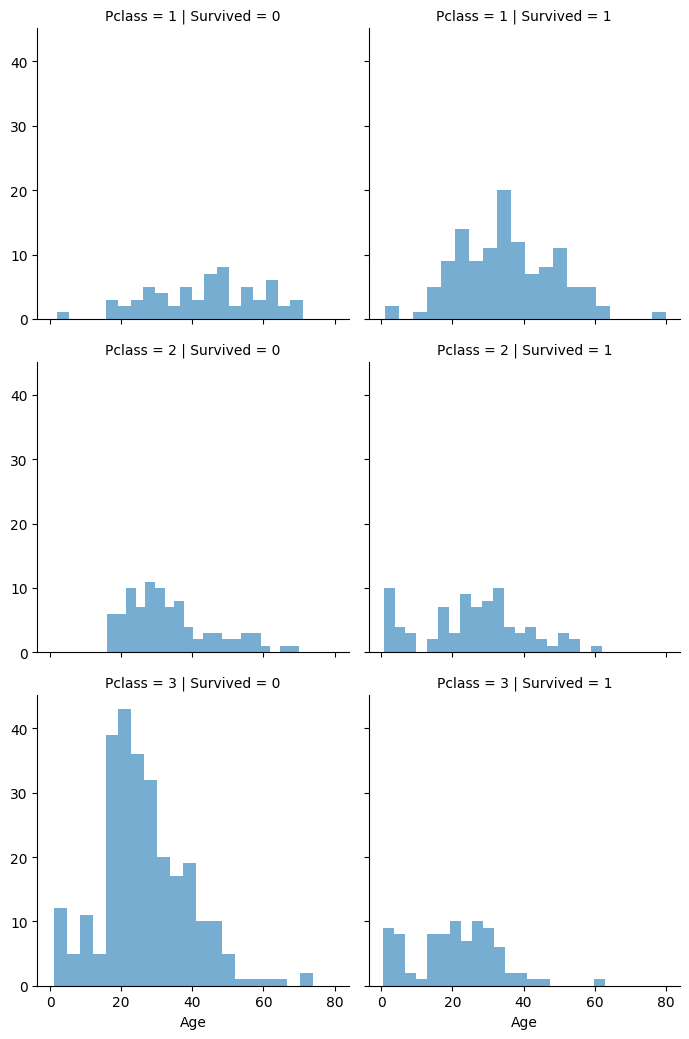

In [13]:
# Plot the Survived feature based on the Pclass feature and the gender of the passengers
df_age = df_train.dropna(subset=["Age", "Pclass", "Survived"])
g = sns.FacetGrid(df_age, col="Survived", row="Pclass", sharex=True, sharey=True, height=3.5)
g.map(plt.hist, "Age", bins=20, alpha=0.6)
g.set_titles("Pclass = {row_name} | Survived = {col_name}")
plt.tight_layout()
plt.show()

## 🔄 Data Preprocessing
Handling missing values and converting features for modeling.

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [16]:
# Combining the datasets
df_train['data_type'] = 'train'
df_test['data_type'] = 'test'
df = pd.concat([df_train, df_test], ignore_index=True)
# Checking the missing values 
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data_type         0
dtype: int64

In [17]:
# Filling the missing values
df['Survived'].fillna(0, inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# Checking the missing values again
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
data_type         0
dtype: int64

## 🧩 Feature Engineering
Converting categorical data to numeric and creating new features.

In [18]:
# Drop less informative columns and convert categorical features
df = df[df['data_type'] != 'test'].reset_index(drop=True)
df = df.drop(columns=['Name', 'Ticket', 'Cabin', "data_type"])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
embarked_map = {k: i for i, k in enumerate(sorted(df['Embarked'].dropna().unique()))}
df['Embarked'] = df['Embarked'].map(embarked_map).astype(int)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
X = df.drop(columns=['Survived'])
y = df['Survived'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   FamilySize   891 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 69.7 KB


## 🧠 Model Building & Training
Splitting data and training machine learning models.

In [19]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((712, 9), (179, 9))

In [20]:
# Train and evaluate models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
results = {}
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, n_jobs=None)
log_reg.fit(X_train, y_train)
acc_log = log_reg.score(X_test, y_test)
results['LogisticRegression'] = acc_log
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
acc_rf = rf.score(X_test, y_test)
results['RandomForest'] = acc_rf
# AdaBoost
ada = AdaBoostClassifier(n_estimators=200, random_state=42)
ada.fit(X_train, y_train)
acc_ada = ada.score(X_test, y_test)
results['AdaBoost'] = acc_ada
for k, v in results.items():
    print(f'{k:>20}: {v:.4f}')

  LogisticRegression: 0.7989
        RandomForest: 0.8156
            AdaBoost: 0.8101


## 📈 Prediction & Evaluation
Making predictions and evaluating model performance.

In [21]:
# Predict Data
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.asarray(y_pred, dtype=float))

[0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
